In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D, DepthwiseConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils 
from keras.layers import Input, Concatenate
from keras.models import Model

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

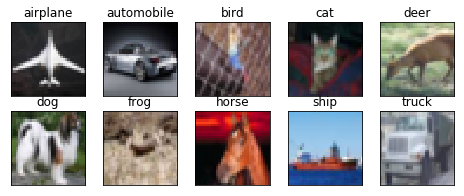

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

**Model as per the requirement**

In [7]:
#Define the model

img_input = Input(shape=(32, 32, 3))

#First Layer - Depth wise seprable convolution
X1 = DepthwiseConv2D(5, depth_multiplier=2, input_shape=(32, 32, 3))(img_input)
X1 = Activation('relu')(X1)
X1 = BatchNormalization()(X1)

#Second Layer - Simple Convolution Layer
X2 = Convolution2D(16, (5, 5), padding = 'same')(X1)
X2 = Activation('relu')(X2)
X2 = BatchNormalization()(X2)

#Third Layer - Simple Convolution Layer
X3 = Convolution2D(16, (5, 5), padding = 'same')(X2)
X3 = Activation('relu')(X3)
X3 = BatchNormalization()(X3)

#Forth Layer - Depth wise seprable convolution on concatenation of X1 and X3
X4 = Concatenate(axis=3)([X1, X3])
X4 = DepthwiseConv2D(5, depth_multiplier=1, padding = 'same')(X4)
X4 = Activation('relu')(X4)
X4 = BatchNormalization()(X4)

#Fifth Layer - Concatenate X1, X4 and apply maxpooling
X5 = Concatenate(axis=3)([X1, X4])
X5 = MaxPooling2D(pool_size=(2, 2), strides=(1,1), padding = 'same')(X5)

#Sixth Layer - Depth wise seprable convolution
X6 = DepthwiseConv2D(3, depth_multiplier=1, padding = 'same')(X5)
X6 = Activation('relu')(X6)
X6 = BatchNormalization()(X6)

#Seventh Layer - Apply convolution on the concatenation of X1, X4 and X6
X7 = Concatenate(axis=3)([X1, X4, X6])
X7 = Convolution2D(16, (5, 5), padding = 'same')(X7)
X7 = Activation('relu')(X7)
X7 = BatchNormalization()(X7)

#Eigth Layer - Depth wise seprable convolution on concatenation of X3, X4, X6 and X7 
X8 = Concatenate(axis=3)([X3, X4, X6, X7])
X8 = DepthwiseConv2D(5, depth_multiplier=1, padding = 'same')(X8)
X8 = Activation('relu')(X8)
X8 = BatchNormalization()(X8)

#Ninth Layer - Depth wise seprable convolution on concatenation of X1, X6, X4, X3, X7, X8
X9 = Concatenate(axis=3)([X1, X3, X4, X6, X7, X8])
X9 = DepthwiseConv2D(5, depth_multiplier=1, padding = 'same')(X9)
X9 = Activation('relu')(X9)
X9 = BatchNormalization()(X9)

#Tenth Layer - Concatenate X1, X4, X6, X8, X9 and apply maxpooling
X10 = Concatenate(axis=3)([X1, X4, X6, X8, X9])
X10 = MaxPooling2D(pool_size=(2, 2), strides=(1,1), padding = 'same')(X10)

#Eleventh Layer - Apply convolution on the concatenation of X7 and X10
X11 = Concatenate(axis=3)([X7, X10])
X11 = Convolution2D(16, (5, 5), padding = 'same')(X11)
X11 = Activation('relu')(X11)
X11 = BatchNormalization()(X11)

#Twelth Layer - Depth wise seprable convolution on concatenation of X2, X4,X8
X12 = Concatenate(axis=3)([X2, X4, X8])
X12 = DepthwiseConv2D(5, depth_multiplier=1, padding = 'same')(X12)
X12 = Activation('relu')(X12)
X12 = BatchNormalization()(X12)

#Thirteenth Layer - Apply convolution on the concatenation of X11, X12, X3, X2, X6
X13 = Concatenate(axis=3)([X2, X3, X6, X11, X12])
X13 = Convolution2D(16, (3, 3), padding = 'same')(X13)
X13 = Activation('relu')(X13)
X13 = BatchNormalization()(X13)

#Fourteenth Layer - Depth wise seprable convolution on concatenation of X13, X3, X8, X12, X4, X1, X6
X14 = Concatenate(axis=3)([X1, X3, X4, X6, X8, X12, X13])
X14 = DepthwiseConv2D(5,  depth_multiplier=1, padding = 'same')(X14)
X14 = Activation('relu')(X14)
X14 = BatchNormalization()(X14)

#Last Layer - Apply big Kernel for the softmax operation
X15 = Concatenate(axis=3)([X4, X8, X12, X14])
X15 = Convolution2D(num_classes, 1)(X15)
X15 = Convolution2D(num_classes, 28)(X15)
X15 = Flatten()(X15)
X15 = Activation('softmax')(X15)

model = Model(img_input, X15, name='model-1')


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
model.summary()

Model: "model-1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
depthwise_conv2d_1 (DepthwiseCo (None, 28, 28, 6)    156         input_1[0][0]                    
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 28, 28, 6)    0           depthwise_conv2d_1[0][0]         
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 28, 28, 6)    24          activation_1[0][0]               
____________________________________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':




Epoch 1/100
390/390 [==============================] - 114s 293ms/step - loss: 1.4275 - acc: 0.5256 - val_loss: 1.5145 - val_acc: 0.5314
Epoch 2/100
390/390 [==============================] - 108s 276ms/step - loss: 1.0182 - acc: 0.6488 - val_loss: 1.2788 - val_acc: 0.5949
Epoch 3/100
390/390 [==============================] - 108s 277ms/step - loss: 0.8606 - acc: 0.7027 - val_loss: 1.2914 - val_acc: 0.5963
Epoch 4/100
390/390 [==============================] - 108s 277ms/step - loss: 0.7448 - acc: 0.7410 - val_loss: 1.5232 - val_acc: 0.5836
Epoch 5/100
390/390 [==============================] - 108s 277ms/step - loss: 0.6542 - acc: 0.7725 - val_loss: 1.3184 - val_acc: 0.6156
Epoch 6/100
390/390 [==============================] - 108s 277ms/step - loss: 0.5872 - acc: 0.7963 - val_loss: 1.3503 - val_acc: 0.6216
Epoch 7/100
390/390 [==============================] - 108s 276ms/step - loss: 0.5183 - acc: 0.8181 - val_loss: 1.4697 - val_acc: 0.6196
Epoch 8/100
390/390 [==================

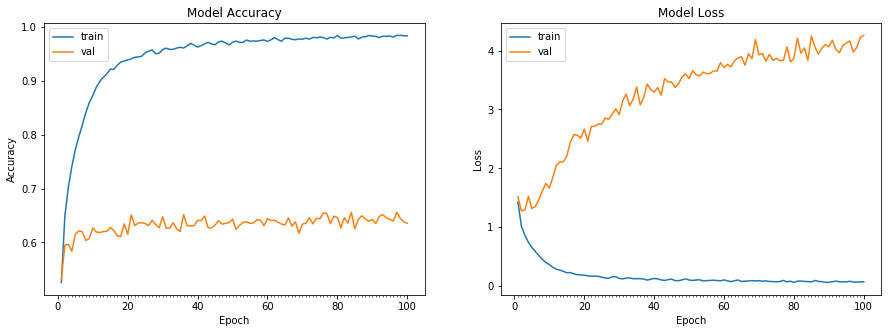

Accuracy on test data is: 63.55


In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))